In [19]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image
import numpy as np
from skimage import io

In [6]:
# Load data dari file 'Mall_Customers.csv'
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Pilih fitur yang tepat untuk melakukan clustering
# Pada contoh ini, kita akan menggunakan fitur 'Age' dan 'Spending Score (1-100)'
fitur = data[['Age', 'Spending Score (1-100)']]

# Lakukan normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

c:\Users\halur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\halur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\halur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\halur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

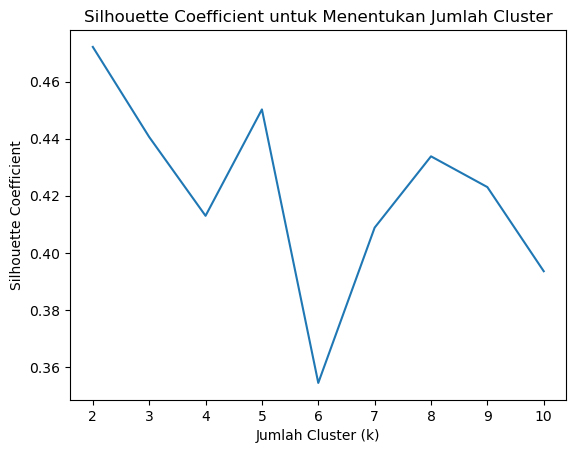

In [8]:
# Tentukan jumlah k yang terbaik menggunakan metode Silhouette Coefficient
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fitur_scaled)
    silhouette_scores.append(silhouette_score(fitur_scaled, kmeans.labels_))

# Plot Silhouette Coefficient untuk menentukan jumlah k yang terbaik
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient untuk Menentukan Jumlah Cluster')
plt.show()

c:\Users\halur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


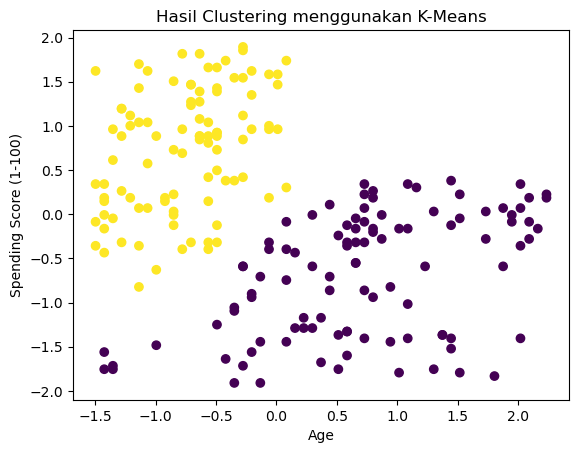

In [10]:
# Pilih jumlah k yang terbaik berdasarkan Silhouette Coefficient
k_terbaik = np.argmax(silhouette_scores) + 2

# Buat model K-Means dengan jumlah k yang terbaik
kmeans = KMeans(n_clusters=k_terbaik)
kmeans.fit(fitur_scaled)

# Plot hasil clustering
plt.scatter(fitur_scaled[:, 0], fitur_scaled[:, 1], c=kmeans.labels_)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()


In [20]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [21]:
cat_path = "cat.jpeg"
cat = io.imread(cat_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [22]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(cat, num_epochs, initial_learning_rate, initial_neighborhood_radius)

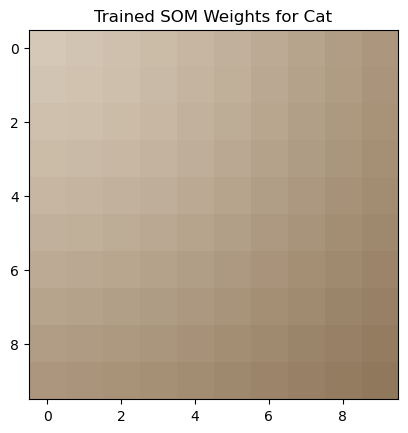

In [23]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Cat')
plt.show()